<a href="https://colab.research.google.com/github/denisecammarota/matbio/blob/master/tp4/P4_Ej1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 4 - Ejercicio 1**: *Modelo de Goodwin*
***Matemática de los Sistemas Biológicos - 2021***

**Alumna**: Denise S. Cammarota

In [ ]:
#importo librerías que me van a ser útiles en hacer las simulaciones
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('seaborn')

En este ejercicio, nos piden estudiar el modelo de Goodwin, asociado al mecanismo de regulación de expresión de un gen. Para ello, utilizaremos las cantidades $m$, $e$ y $p$, que son respectivamente la concentración de mRNA(ARN mensajero), la concentración de una enzima que favorece la creación de una proteína y la concentración de proteínas en la célula. Así, el sistema dinámico formulado por Goodwin se expresa por las ecuaciones:

$\frac{dm}{dt} = \alpha_{m} g_{R}(p) - \beta_{m} m$

$\frac{de}{dt} = \alpha_{e} m - \beta_{e} e$

y

$\frac{dp}{dt} = \alpha_{p} m - \beta_{p} p$,

donde $\alpha_{m}$, $\alpha_{e}$  y $\alpha_{p}$ son las tasas de producción de mRNA, la enzima y de la proteína, respectivamente. Por otra parte, los parámetros $\beta_{m}$, $\beta_{e}$  y $\beta_{p}$ indican las tasas de degradación de estas concentraciones del mRNA, la enzima y de la proteína. Finalmente, la función $g_{R}(p)$ tiene la forma:

$g_{R}(p) = \frac{a}{b + c p^{h}}$,

donde $a,b$ y $c$ son constantes; y $h$ recibe el nombre de exponente de Hill. 

Dibujemos primero entonces la función $g_{R}(p)$ para los valores de $a = b = c = 1$ sugeridos en la guía, y diferentes valores del coeficiente $h$.

Observamos que, para estos valores de parámetros, la función $g_{R}(p)$ tiene la forma esperada para la regulación, como vista en las clases teóricas. Cabe destacar que esto no sucede para todo el espacio de parámetros, como se puede ver de una simple exploración cambiando estos valores. 




In [ ]:
def g_rep(x,a,b,c,h):
  y = (a/(b + c*(x**h)))
  return y

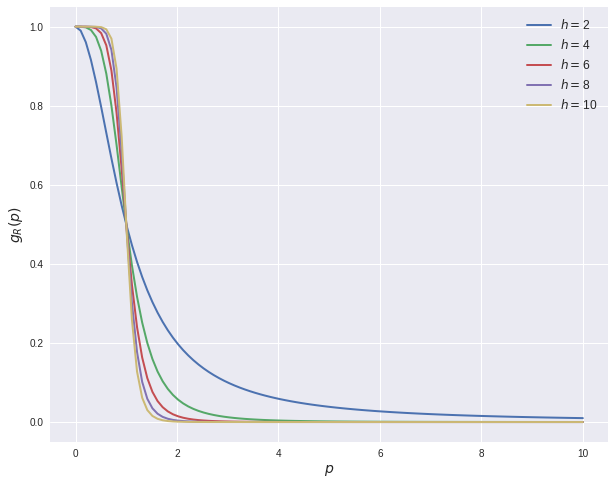

In [ ]:
x = np.linspace(0,10,100)
vec_h = [2,4,6,8,10]
fig, ax = plt.subplots(figsize=(10,8))
for i in vec_h:
  y = g_rep(x,1,1,1,i)
  ax.plot(x,y,label='$h =$'+str(i),linewidth=2)
ax.legend(fontsize=12)
ax.set_xlabel('$p$',fontsize=14)
ax.set_ylabel('$g_{R} (p)$',fontsize=14)
fig.show()

Ahora, utilizamos los valores sugeridos de las tasas de producción y de degradación, que son $\alpha_{m} = \alpha_{e} = \alpha_{p} = 1$ y $\beta_{m} = \beta_{e} = \beta_{p} = 0.1$. Para la función $g_{R} (p)$, continuaremos utilizando $a=b=c=1$, como anteriormente.Con estos valores fijos, vamos a modificar el exponente $h$, observando los diferentes comportamientos de las concentraciones en función del tiempo. Como condiciones iniciales, elegimos concentraciones $m(0) = 0.1$, $e(0) = 0$ y $p(0) = 0$.  Es decir, tenemos una concentración no nula de ARN mensajero, y nula de enzima y proteínas. 

Para resolver las ecuaciones, vamos a utilizar la funcion **odeint** de la librería SciPy de Python, que nos permite integrar sistemas de ecuaciones diferenciales ordinarias. 

In [ ]:
def model_goodwin(y,t,am,ae,ap,bm,be,bp,a,b,c,h):
  m,e,p = y
  dmdt = am*g_rep(p,a,b,c,h) - bm*m
  dedt = ae*m - be*e
  dpdt = ap*e - bp*p
  return dmdt,dedt,dpdt

## Oscilaciones en función  de $h$
Por ejemplo, en las celdas siguientes graficamos separadamente las concentraciones $m,e,p$ en función del tiempo y para diferentes valores de $h$, menores a $8$. Para estos parámetros, no observamos la presencia de oscilaciones sostenidas en ninguna de las cantidades relevantes en estudio, sino que. Si existen algunas oscilaciones, se tiene que son oscilaciones amortiguadas que eventualmente desaparecen. 

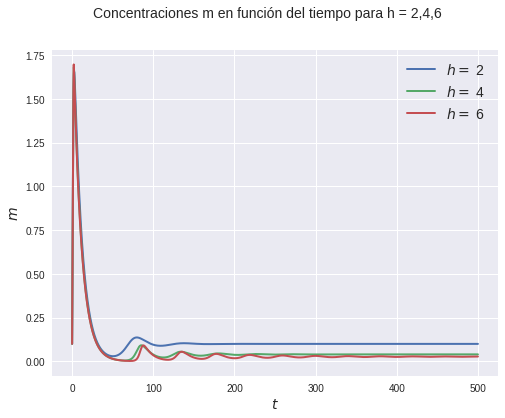

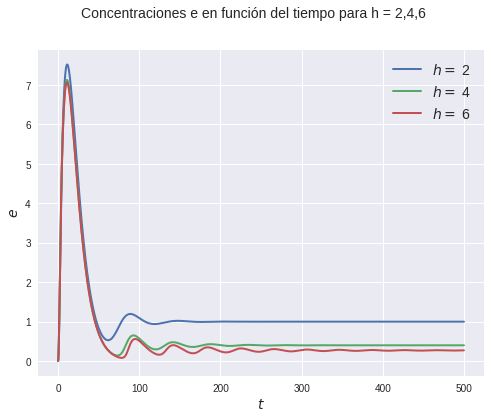

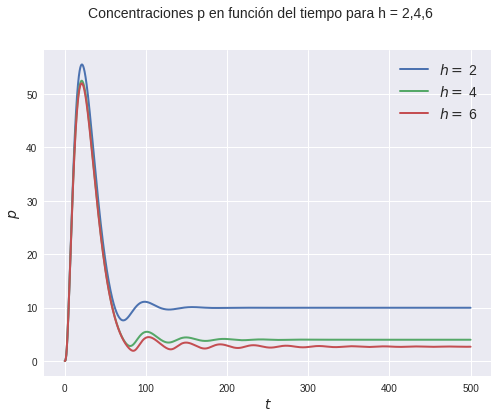

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8,6))
fig2, ax2 = plt.subplots(figsize=(8,6))
fig3, ax3 = plt.subplots(figsize=(8,6))
y0 = 0.1,0,0
t = np.linspace(0,500,10000)
am = ae = ap = 1
bm = be = bp = 0.1
a = b = c = 1
h = [2,4,6]
for i in h:
  sol = odeint(model_goodwin, y0, t, args=(am,ae,ap,bm,be,bp,a,b,c,i))
  m,e,p = sol.T 
  ax1.plot(t,m,label='$h=$ '+str(i),linewidth=2)
  ax2.plot(t,e,label='$h=$ '+str(i),linewidth=2)
  ax3.plot(t,p,label='$h=$ '+str(i),linewidth=2)
ax1.set_xlabel('$t$',fontsize=14)
ax2.set_xlabel('$t$',fontsize=14)
ax3.set_xlabel('$t$',fontsize=14)
ax1.set_ylabel('$m$',fontsize=14)
ax2.set_ylabel('$e$',fontsize=14)
ax3.set_ylabel('$p$',fontsize=14)
ax1.legend(fontsize=14)
ax2.legend(fontsize=14)
ax3.legend(fontsize=14)
fig1.suptitle('Concentraciones m en función del tiempo para h = 2,4,6',fontsize=14)
fig2.suptitle('Concentraciones e en función del tiempo para h = 2,4,6',fontsize=14)
fig3.suptitle('Concentraciones p en función del tiempo para h = 2,4,6',fontsize=14)
fig1.show()
fig2.show()
fig3.show()

Considerando valores de $h$ mayores o iguales a $8$, encontramos varias condiciones tales que hay oscilaciones que se sostienen en el tiempo, como las solicitadas en la consigna del ejercicio. 

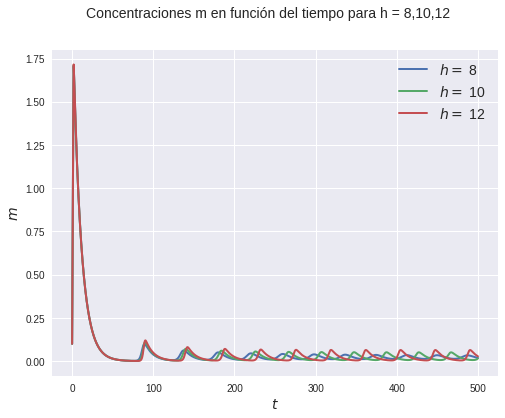

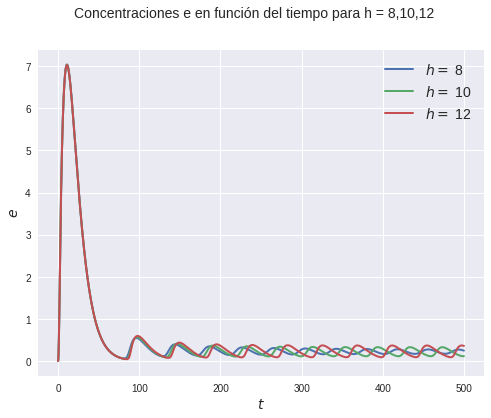

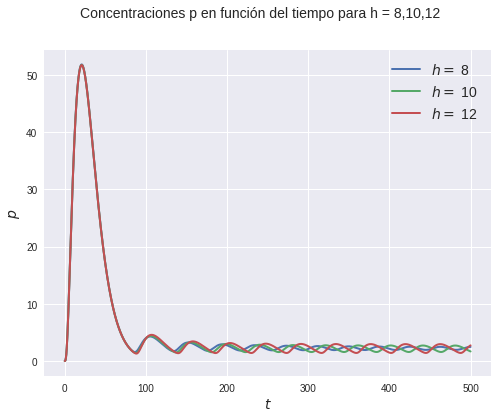

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8,6))
fig2, ax2 = plt.subplots(figsize=(8,6))
fig3, ax3 = plt.subplots(figsize=(8,6))
y0 = 0.1,0,0
t = np.linspace(0,500,10000)
am = ae = ap = 1
bm = be = bp = 0.1
a = b = c = 1
h = [8,10,12]
for i in h:
  sol = odeint(model_goodwin, y0, t, args=(am,ae,ap,bm,be,bp,a,b,c,i))
  m,e,p = sol.T 
  ax1.plot(t,m,label='$h=$ '+str(i),linewidth=2)
  ax2.plot(t,e,label='$h=$ '+str(i),linewidth=2)
  ax3.plot(t,p,label='$h=$ '+str(i),linewidth=2)
ax1.set_xlabel('$t$',fontsize=14)
ax2.set_xlabel('$t$',fontsize=14)
ax3.set_xlabel('$t$',fontsize=14)
ax1.set_ylabel('$m$',fontsize=14)
ax2.set_ylabel('$e$',fontsize=14)
ax3.set_ylabel('$p$',fontsize=14)
ax1.legend(fontsize=14)
ax2.legend(fontsize=14)
ax3.legend(fontsize=14)
fig1.suptitle('Concentraciones m en función del tiempo para h = 8,10,12',fontsize=14)
fig2.suptitle('Concentraciones e en función del tiempo para h = 8,10,12',fontsize=14)
fig3.suptitle('Concentraciones p en función del tiempo para h = 8,10,12',fontsize=14)
fig1.show()
fig2.show()
fig3.show()

## Oscilaciones en función  de las degradaciones $\beta$

Ahora, observamos que las oscilaciones pueden desaparecen acelerando las tasas de degración $\beta_{m}, \beta_{e}$ y $\beta_{p}$. Para ello, mantendremos condiciones que anteriormente daban oscilaciones, fijando $h=10$. Lo único que cambiamos serán los valores de las degradaciones. Por ejemplo, para una degradación de $0.7$, observamos que las oscilaciones persisten. De la simple observación, podemos percibir que las amplitudes de las mismas son mayores. Probando con valores en el rango $0.1-0.7$, se siguen observando oscilaciones. 

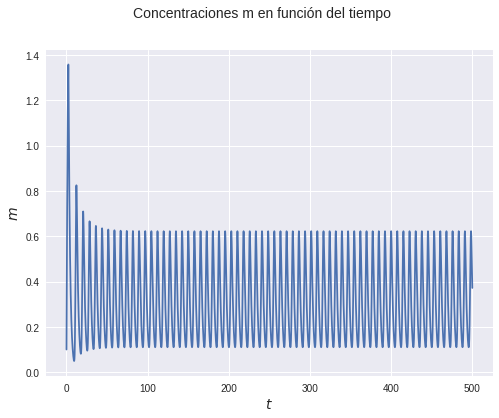

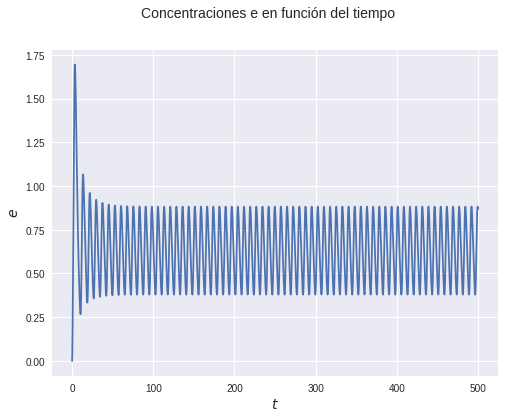

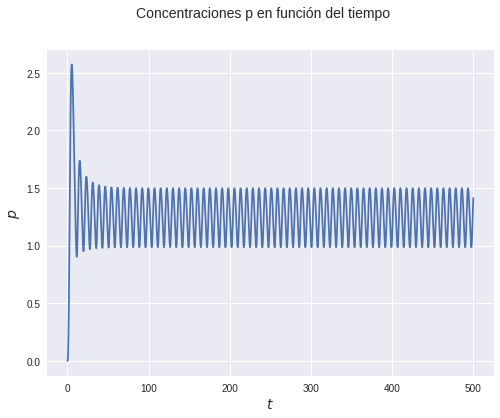

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8,6))
fig2, ax2 = plt.subplots(figsize=(8,6))
fig3, ax3 = plt.subplots(figsize=(8,6))
y0 = 0.1,0,0
t = np.linspace(0,500,10000)
am = ae = ap = 1
bm = be = bp = 0.5
a = b = c = 1
h = 10
sol = odeint(model_goodwin, y0, t, args=(am,ae,ap,bm,be,bp,a,b,c,i))
m,e,p = sol.T 
ax1.plot(t,m)
ax2.plot(t,e)
ax3.plot(t,p)
ax1.set_xlabel('$t$',fontsize=14)
ax2.set_xlabel('$t$',fontsize=14)
ax3.set_xlabel('$t$',fontsize=14)
ax1.set_ylabel('$m$',fontsize=14)
ax2.set_ylabel('$e$',fontsize=14)
ax3.set_ylabel('$p$',fontsize=14)
fig1.suptitle('Concentraciones m en función del tiempo',fontsize=14)
fig2.suptitle('Concentraciones e en función del tiempo',fontsize=14)
fig3.suptitle('Concentraciones p en función del tiempo',fontsize=14)
fig1.show()
fig2.show()
fig3.show()

En cambio, fijando $\beta_{m} = \beta_{e} = \beta_{p} = 0.8$, las oscilaciones observadas anteriormente desaparecen. En cambio, se observan oscilaciones amortiguadas nuevamente, como sugiere el enunciado.

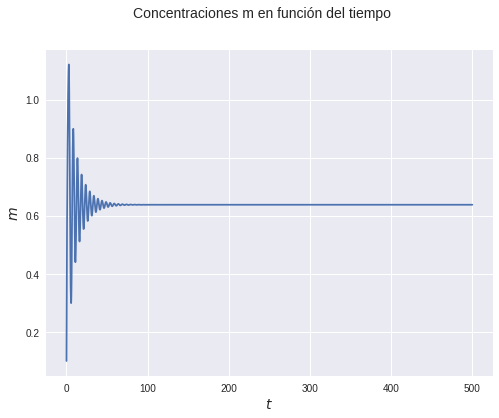

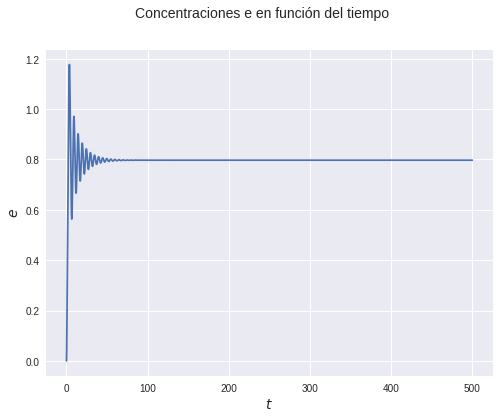

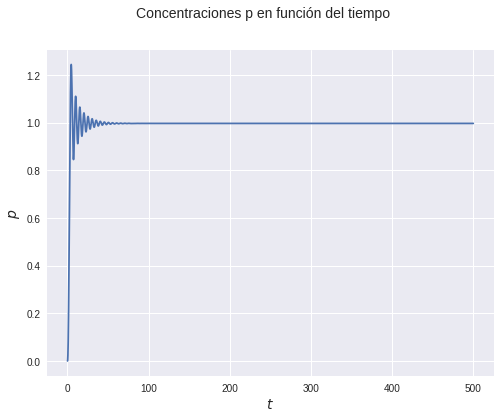

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8,6))
fig2, ax2 = plt.subplots(figsize=(8,6))
fig3, ax3 = plt.subplots(figsize=(8,6))
y0 = 0.1,0,0
t = np.linspace(0,500,10000)
am = ae = ap = 1
bm = be = bp = 0.8
a = b = c = 1
h = 10
sol = odeint(model_goodwin, y0, t, args=(am,ae,ap,bm,be,bp,a,b,c,i))
m,e,p = sol.T 
ax1.plot(t,m)
ax2.plot(t,e)
ax3.plot(t,p)
ax1.set_xlabel('$t$',fontsize=14)
ax2.set_xlabel('$t$',fontsize=14)
ax3.set_xlabel('$t$',fontsize=14)
ax1.set_ylabel('$m$',fontsize=14)
ax2.set_ylabel('$e$',fontsize=14)
ax3.set_ylabel('$p$',fontsize=14)
fig1.suptitle('Concentración m en función del tiempo',fontsize=14)
fig2.suptitle('Concentración e en función del tiempo',fontsize=14)
fig3.suptitle('Concentración p en función del tiempo',fontsize=14)
fig1.show()
fig2.show()
fig3.show()